In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
!cp /content/drive/MyDrive/The\ School\ of\ AI/ERAV3/ERAv3_Session7_Assignment_v1/model_v1.py /content
!cp /content/drive/MyDrive/The\ School\ of\ AI/ERAV3/ERAv3_Session7_Assignment_v1/utils_v1.py /content

In [ ]:
import model_v1
import utils_v1
from model_v1 import Net
from utils_v1 import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CUDA Available? True
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CUDA Available? True


In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    #transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    #transforms.RandomRotation((-15., 15.), fill=0), # do it in later attempt
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.1407,), (0.4081,)) --> This is incorrect line and hence commented
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
#test_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms) --> Commented the incorrect line. train = False and test_transform needs to be passed
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [ ]:
type(train_data), len(train_data), len(train_data[0]), train_data.data.shape, test_data.data.shape

(torchvision.datasets.mnist.MNIST,
 60000,
 2,
 torch.Size([60000, 28, 28]),
 torch.Size([10000, 28, 28]))

In [ ]:
SEED = 1
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

batch_size = 128

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

#kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True} --> Commented the incorrect line. shuffle parameter needs to be True
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

#test_loader = torch.utils.data.DataLoader(train_data, **kwargs) --> Commented the incorrect line. test_data needs be passed for test_loader
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CUDA Available? True


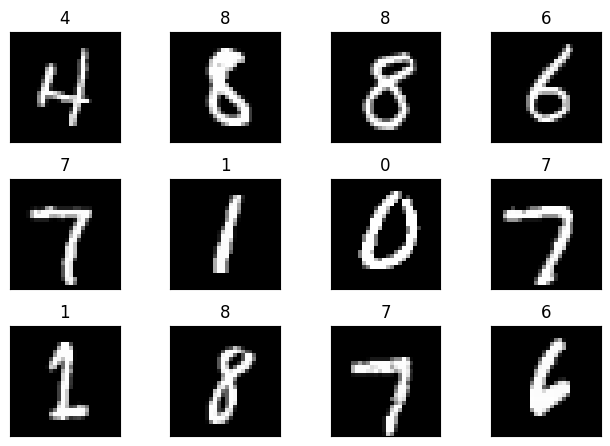

In [ ]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [ ]:
from tqdm import tqdm

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
!pip install torchsummary
from torchsummary import summary

In [ ]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,608
              ReLU-6           [-1, 32, 24, 24]               0
       BatchNorm2d-7           [-1, 32, 24, 24]              64
           Dropout-8           [-1, 32, 24, 24]               0
            Conv2d-9           [-1, 64, 22, 22]          18,432
             ReLU-10           [-1, 64, 22, 22]               0
      BatchNorm2d-11           [-1, 64, 22, 22]             128
          Dropout-12           [-1, 64, 22, 22]               0
           Conv2d-13          [-1, 128, 20, 20]          73,728
             ReLU-14          [-1, 128,

In [ ]:
import torch.optim.lr_scheduler as lrs

In [ ]:
model = Net().to(device)
#optimizer = optim.SGD(model.parameters(), lr=10.01, momentum=0.9) -- Commented the line since learning rate needs to be corrected
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = lrs.ReduceLROnPlateau(optimizer, 'min',patience = 3, verbose=True)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
#criterion = F.nll_loss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  #test(model, device, train_loader) --> Removed this incorrect line. test_loader needs to be passed here
  test(model, device, test_loader, criterion)
  scheduler.step()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1


Train: Loss=0.0338 Batch_id=468 Accuracy=95.25: 100%|██████████| 469/469 [00:19<00:00, 23.97it/s]


Test set: Average loss: 0.0461, Accuracy: 9861/10000 (98.61%)

Epoch 2


Train: Loss=0.0579 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:18<00:00, 25.27it/s]


Test set: Average loss: 0.0272, Accuracy: 9921/10000 (99.21%)

Epoch 3


Train: Loss=0.0094 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:18<00:00, 25.05it/s]


Test set: Average loss: 0.0248, Accuracy: 9914/10000 (99.14%)

Epoch 4


Train: Loss=0.0169 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:19<00:00, 24.55it/s]


Test set: Average loss: 0.0260, Accuracy: 9921/10000 (99.21%)

Epoch 5


Train: Loss=0.0298 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:18<00:00, 25.89it/s]


Test set: Average loss: 0.0216, Accuracy: 9928/10000 (99.28%)

Epoch 6


Train: Loss=0.0236 Batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:17<00:00, 26.42it/s]


Test set: Average loss: 0.0211, Accuracy: 9923/10000 (99.23%)

Epoch 7


Train: Loss=0.0047 Batch_id=468 Accuracy=99.55: 100%|██████████| 469/469 [00:18<00:00, 25.75it/s]


Test set: Average loss: 0.0157, Accuracy: 9953/10000 (99.53%)

Epoch 8


Train: Loss=0.0065 Batch_id=468 Accuracy=99.61: 100%|██████████| 469/469 [00:19<00:00, 23.83it/s]


Test set: Average loss: 0.0161, Accuracy: 9953/10000 (99.53%)

Epoch 9


Train: Loss=0.0131 Batch_id=468 Accuracy=99.61: 100%|██████████| 469/469 [00:17<00:00, 26.33it/s]


Test set: Average loss: 0.0163, Accuracy: 9948/10000 (99.48%)

Epoch 10


Train: Loss=0.0333 Batch_id=468 Accuracy=99.63: 100%|██████████| 469/469 [00:18<00:00, 25.65it/s]


Test set: Average loss: 0.0165, Accuracy: 9948/10000 (99.48%)

Epoch 11


Train: Loss=0.0033 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:18<00:00, 25.84it/s]


Test set: Average loss: 0.0160, Accuracy: 9951/10000 (99.51%)

Epoch 12


Train: Loss=0.0020 Batch_id=468 Accuracy=99.66: 100%|██████████| 469/469 [00:17<00:00, 26.36it/s]


Test set: Average loss: 0.0159, Accuracy: 9951/10000 (99.51%)

Epoch 13


Train: Loss=0.0135 Batch_id=468 Accuracy=99.66: 100%|██████████| 469/469 [00:21<00:00, 22.13it/s]


Test set: Average loss: 0.0156, Accuracy: 9950/10000 (99.50%)

Epoch 14


Train: Loss=0.0044 Batch_id=468 Accuracy=99.67: 100%|██████████| 469/469 [00:17<00:00, 26.06it/s]


Test set: Average loss: 0.0156, Accuracy: 9951/10000 (99.51%)

Epoch 15


Train: Loss=0.0362 Batch_id=468 Accuracy=99.67: 100%|██████████| 469/469 [00:18<00:00, 25.57it/s]


Test set: Average loss: 0.0161, Accuracy: 9951/10000 (99.51%)

Epoch 16


Train: Loss=0.0046 Batch_id=468 Accuracy=99.66: 100%|██████████| 469/469 [00:17<00:00, 26.48it/s]


Test set: Average loss: 0.0159, Accuracy: 9952/10000 (99.52%)

Epoch 17


Train: Loss=0.0133 Batch_id=468 Accuracy=99.67: 100%|██████████| 469/469 [00:17<00:00, 26.50it/s]


Test set: Average loss: 0.0163, Accuracy: 9952/10000 (99.52%)

Epoch 18


Train: Loss=0.0048 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:19<00:00, 24.41it/s]


Test set: Average loss: 0.0160, Accuracy: 9951/10000 (99.51%)

Epoch 19


Train: Loss=0.0289 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:17<00:00, 26.38it/s]


Test set: Average loss: 0.0160, Accuracy: 9953/10000 (99.53%)

Epoch 20


Train: Loss=0.0174 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:17<00:00, 26.64it/s]


Test set: Average loss: 0.0155, Accuracy: 9954/10000 (99.54%)



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# plotting to be fixed in next attempt
#printTrainTest_LossAcc(train_losses,train_acc,test_losses,test_acc)

1. This is a good model. Got the skeleton right.
2. Model has 197k parameters
3. Train accuracy : 99.68%
4. Test acuracy : 99.54%
5. model maintains consistency across epoch between train and test accuracies.
6. accuracy is above 99.5%
7. scope to improve:
   #### 7.1: make model light weight. Try to bring it below 20k parameters
   #### 7.2: train it for 20 epochs
   #### 7.3: focus to get > 99.4% accuracy with this configuration
   
  